# 40 - Risk and Uncertainty Quantification

**Key Idea:** Statistics gives us tools to measure risk and uncertainty, so we can make smarter choices.

**The Analogy:** Crossing the street - You look both ways to estimate risk. You don't know for sure if a car is coming, but you judge the chance and act.

## Simple Example: Should You Bring an Umbrella?

Let's say the weather forecast shows:
- **40% chance of rain**
- **60% chance of no rain**

This is **probability** - the chance something will happen. We can use it to decide if we need an umbrella!

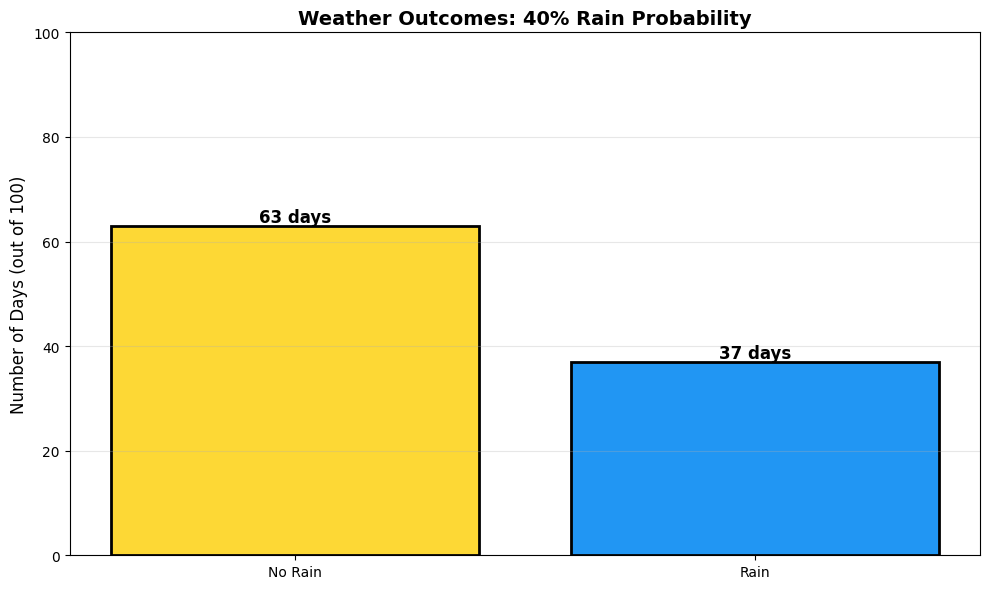


Out of 100 days:
  Rainy days: 37
  Dry days: 63

→ Probability helps us plan ahead, even when we can't predict exactly!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 100 days with 40% rain probability
np.random.seed(42)
days = 100
rain_probability = 0.40

# Simulate weather (1 = rain, 0 = no rain)
weather = np.random.choice([0, 1], size=days, p=[1-rain_probability, rain_probability])
rainy_days = np.sum(weather)
dry_days = days - rainy_days

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(['No Rain', 'Rain'], [dry_days, rainy_days], color=['#FDD835', '#2196F3'], edgecolor='black', linewidth=2)
ax.set_ylabel('Number of Days (out of 100)', fontsize=12)
ax.set_title('Weather Outcomes: 40% Rain Probability', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)} days',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nOut of 100 days:")
print(f"  Rainy days: {rainy_days}")
print(f"  Dry days: {dry_days}")
print(f"\n→ Probability helps us plan ahead, even when we can't predict exactly!")

## Understanding Confidence Intervals

A **confidence interval** tells us a range where we think the true answer probably is.

**Example:** A basketball player averages 20 points per game. But we're not 100% certain - maybe it's 18, maybe 22. A **95% confidence interval** might be **[18, 22]**.

This means: "We're 95% confident the player's true average is between 18 and 22 points."

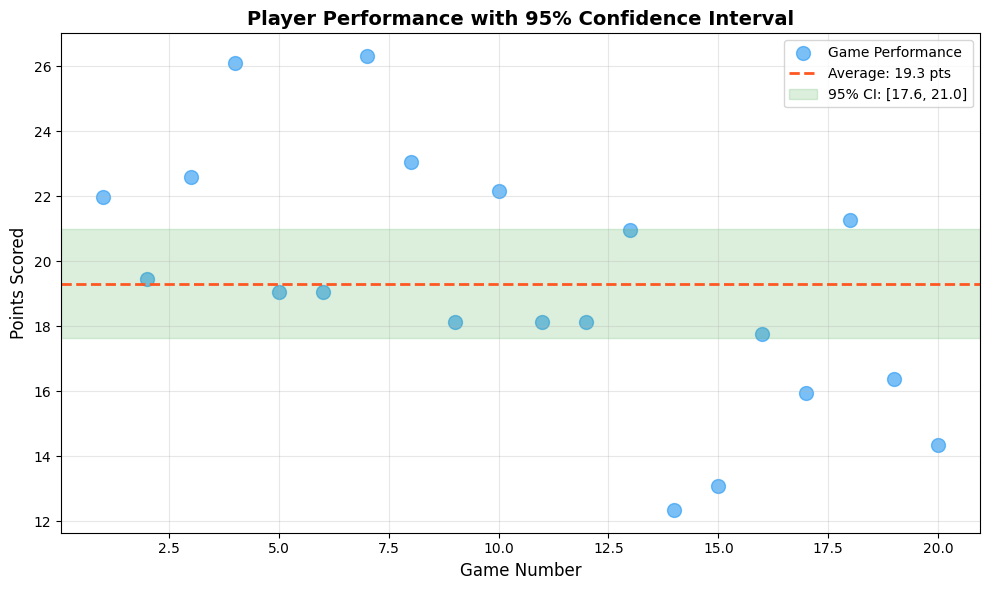


Player Statistics:
  Average: 19.3 points per game
  95% Confidence Interval: [17.6, 21.0]

→ We're 95% confident the player's true skill is in this range!
→ The wider the range, the more uncertain we are.


In [2]:
# Simulate basketball player performance
np.random.seed(42)
games = 20
true_average = 20  # True skill level
points_per_game = np.random.normal(true_average, 4, games)  # Some variability

# Calculate statistics
mean_points = np.mean(points_per_game)
std_error = np.std(points_per_game, ddof=1) / np.sqrt(games)

# 95% Confidence Interval (roughly mean ± 2 * standard error)
ci_lower = mean_points - 1.96 * std_error
ci_upper = mean_points + 1.96 * std_error

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

# Plot individual games
ax.scatter(range(1, games+1), points_per_game, color='#2196F3', s=100, alpha=0.6, label='Game Performance')

# Plot average line
ax.axhline(y=mean_points, color='#FF5722', linestyle='--', linewidth=2, label=f'Average: {mean_points:.1f} pts')

# Plot confidence interval
ax.axhspan(ci_lower, ci_upper, alpha=0.2, color='#4CAF50', label=f'95% CI: [{ci_lower:.1f}, {ci_upper:.1f}]')

ax.set_xlabel('Game Number', fontsize=12)
ax.set_ylabel('Points Scored', fontsize=12)
ax.set_title('Player Performance with 95% Confidence Interval', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPlayer Statistics:")
print(f"  Average: {mean_points:.1f} points per game")
print(f"  95% Confidence Interval: [{ci_lower:.1f}, {ci_upper:.1f}]")
print(f"\n→ We're 95% confident the player's true skill is in this range!")
print(f"→ The wider the range, the more uncertain we are.")

## Real-World Example: Investment Returns

An investment firm predicts stock returns for the next year:
- **Average return: 8%**
- **95% Confidence Interval: [5%, 11%]**

This tells investors:
- ✅ **Opportunity:** Could gain up to 11%
- ⚠️ **Risk:** Could be as low as 5%
- 📊 **Uncertainty:** We can't predict exactly, but we know the likely range

Let's simulate this investment scenario!

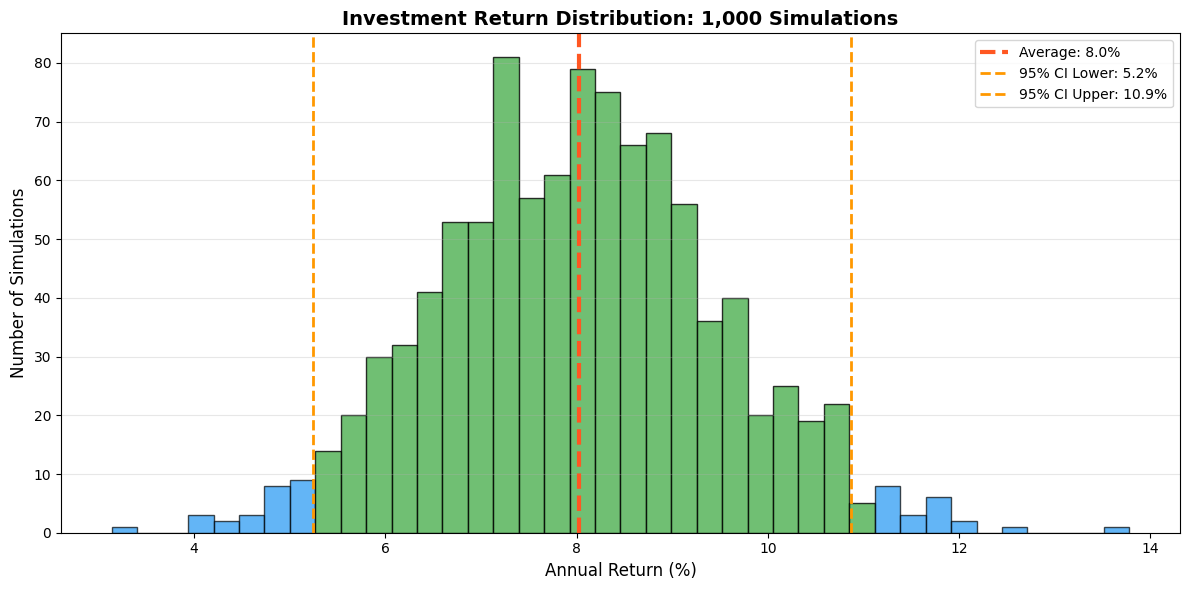


Investment Analysis:
  Expected Return: 8.0%
  95% Confidence Interval: [5.2%, 10.9%]

  → Best Case (top 2.5%): Returns above 10.9%
  → Worst Case (bottom 2.5%): Returns below 5.2%
  → Most Likely (95% of time): Returns between 5.2% and 10.9%

→ This range shows BOTH opportunity AND risk - crucial for smart investing!


In [3]:
# Simulate 1000 possible investment outcomes
np.random.seed(42)
simulations = 1000
expected_return = 8.0  # Average 8%
std_dev = 1.5  # Standard deviation

# Generate returns
returns = np.random.normal(expected_return, std_dev, simulations)

# Calculate confidence interval
ci_95_lower = np.percentile(returns, 2.5)
ci_95_upper = np.percentile(returns, 97.5)
mean_return = np.mean(returns)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram of returns
counts, bins, patches = ax.hist(returns, bins=40, color='#2196F3', alpha=0.7, edgecolor='black')

# Color the confidence interval region
for i, patch in enumerate(patches):
    if ci_95_lower <= bins[i] <= ci_95_upper:
        patch.set_facecolor('#4CAF50')
        patch.set_alpha(0.8)

# Add vertical lines
ax.axvline(mean_return, color='#FF5722', linestyle='--', linewidth=3, label=f'Average: {mean_return:.1f}%')
ax.axvline(ci_95_lower, color='#FF9800', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_95_lower:.1f}%')
ax.axvline(ci_95_upper, color='#FF9800', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_95_upper:.1f}%')

ax.set_xlabel('Annual Return (%)', fontsize=12)
ax.set_ylabel('Number of Simulations', fontsize=12)
ax.set_title('Investment Return Distribution: 1,000 Simulations', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nInvestment Analysis:")
print(f"  Expected Return: {mean_return:.1f}%")
print(f"  95% Confidence Interval: [{ci_95_lower:.1f}%, {ci_95_upper:.1f}%]")
print(f"\n  → Best Case (top 2.5%): Returns above {ci_95_upper:.1f}%")
print(f"  → Worst Case (bottom 2.5%): Returns below {ci_95_lower:.1f}%")
print(f"  → Most Likely (95% of time): Returns between {ci_95_lower:.1f}% and {ci_95_upper:.1f}%")
print(f"\n→ This range shows BOTH opportunity AND risk - crucial for smart investing!")

## Key Statistical Tools for Risk Quantification

| Tool | What It Measures | Example |
|------|------------------|----------|
| **Probability** | Chance something happens | 40% chance of rain |
| **Confidence Intervals** | How precise our estimate is | Stock return: 8% ± 3% |
| **P-values** | Evidence for or against assumptions | Is this drug effective? |
| **Hypothesis Tests** | Framework for decisions | Should we launch this product? |

**Bottom Line:** Statistics helps us put numbers on uncertainty. We can't predict the future perfectly, but we CAN estimate risks and make informed decisions!